In [102]:
import itertools
import re

import numpy as np
import matplotlib.pyplot as plt
import torch

In [103]:
# Meditations by Marcus Aurelius
# https://www.gutenberg.org/files/2680/2680-0.txt
with open("books/2680-0.txt", "rt", encoding="utf-8") as file:
    text = file.read()
blocks = [b.strip().replace("\n", " ") for b in text.split("\n\n") if b]
paragraphs = []
get = False
for b in blocks:
    if not get and b == "THE FIRST BOOK":
        get = True
    if get:
        number = "[IVX]+\."
        if m := re.match(number, b):
            _, end = m.span()
            paragraphs.append(b[end + 1 :])
        if b == "NOTES":
            break
paragraphs = [p for p in paragraphs]
paragraphs[0] = ". " + paragraphs[0]

In [104]:
for p in paragraphs[:5]:
    print(p)

. Of my grandfather Verus I have learned to be gentle and meek, and to refrain from all anger and passion. From the fame and memory of him that begot me I have learned both shamefastness and manlike behaviour. Of my mother I have learned to be religious, and bountiful; and to forbear, not only to do, but to intend any evil; to content myself with a spare diet, and to fly all such excess as is incidental to great wealth. Of my great-grandfather, both to frequent public schools and auditories, and to get me good and able teachers at home; and that I ought not to think much, if upon such occasions, I were at excessive charges.
Of him that brought me up, not to be fondly addicted to either of the two great factions of the coursers in the circus, called Prasini, and Veneti: nor in the amphitheatre partially to favour any of the gladiators, or fencers, as either the Parmularii, or the Secutores. Moreover, to endure labour; nor to need many things; when I have anything to do, to do it myself 

In [105]:
text = " ".join(paragraphs)
print(text[:5000] + " ...")

. Of my grandfather Verus I have learned to be gentle and meek, and to refrain from all anger and passion. From the fame and memory of him that begot me I have learned both shamefastness and manlike behaviour. Of my mother I have learned to be religious, and bountiful; and to forbear, not only to do, but to intend any evil; to content myself with a spare diet, and to fly all such excess as is incidental to great wealth. Of my great-grandfather, both to frequent public schools and auditories, and to get me good and able teachers at home; and that I ought not to think much, if upon such occasions, I were at excessive charges. Of him that brought me up, not to be fondly addicted to either of the two great factions of the coursers in the circus, called Prasini, and Veneti: nor in the amphitheatre partially to favour any of the gladiators, or fencers, as either the Parmularii, or the Secutores. Moreover, to endure labour; nor to need many things; when I have anything to do, to do it myself 

In [106]:
word_pattern = r"[\.\;\,\:\?\!]|[\s]|[a-zA-Z]+"

In [107]:
words = set()
words = re.findall(word_pattern, text)    
words = {p.lower() for p in words} - {" "}
words = sorted(list(words))

In [108]:
print(len(words))
print(words)

4121
['!', ',', '.', ':', ';', '?', 'a', 'abandoned', 'aberration', 'abide', 'abides', 'abideth', 'abiding', 'ability', 'able', 'abode', 'abominable', 'about', 'above', 'abroad', 'absent', 'absolute', 'absolutely', 'abstain', 'absurd', 'abuse', 'abused', 'accept', 'acceptable', 'acceptation', 'accepted', 'accepting', 'access', 'accessories', 'accessory', 'accidentary', 'accidents', 'acclamation', 'acclamations', 'accommodate', 'accompany', 'accomplished', 'accomplishment', 'accord', 'according', 'accordingly', 'account', 'accounted', 'accurate', 'accurately', 'accusations', 'accuse', 'accused', 'accustomed', 'achieved', 'acknowledged', 'acquaintances', 'acquainted', 'acquit', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'actor', 'actors', 'acts', 'actually', 'acute', 'add', 'added', 'addict', 'addicted', 'adhere', 'adjure', 'administered', 'administration', 'administrator', 'admirable', 'admiration', 'admire', 'admired', 'admiring', 'admit', 'admitted', 'admitting

In [109]:
tokens_list = []
for p in paragraphs:
    tokens_list.append([t.lower() for t in re.findall(word_pattern, p) if t != " "])
tokens = tokens_list[0] + sum(tokens_list[1:], [])

In [110]:
print(len(tokens))
current_line = []
for token in tokens[1:1000]:
    current_line.append(token)
    if token == ".":
        line = " ".join(current_line).capitalize()
        line = line.replace(" .", ".")
        line = line.replace(" ,", ",")
        line = line.replace(" ;", ";")
        line = line.replace(" ?", "?")
        line = line.replace(" :", ":")
        line = line.replace(" !", "!")
        print(line)
        current_line = []

58888
Of my grandfather verus i have learned to be gentle and meek, and to refrain from all anger and passion.
From the fame and memory of him that begot me i have learned both shamefastness and manlike behaviour.
Of my mother i have learned to be religious, and bountiful; and to forbear, not only to do, but to intend any evil; to content myself with a spare diet, and to fly all such excess as is incidental to great wealth.
Of my great grandfather, both to frequent public schools and auditories, and to get me good and able teachers at home; and that i ought not to think much, if upon such occasions, i were at excessive charges.
Of him that brought me up, not to be fondly addicted to either of the two great factions of the coursers in the circus, called prasini, and veneti: nor in the amphitheatre partially to favour any of the gladiators, or fencers, as either the parmularii, or the secutores.
Moreover, to endure labour; nor to need many things; when i have anything to do, to do it mys

In [111]:
pairs = {}
for c1, c2 in zip(tokens[:-1], tokens[1:]):
    pairs[(c1, c2)] = pairs.get((c1, c2), 0) + 1
total = sum(pairs.values())
for k, v in pairs.items():
    pairs[k] = v / total
pairs = sorted(pairs.items(), key=lambda x: x[1], reverse=True)

In [112]:
print(len(pairs))
for digram, p in pairs:
    frag = " ".join(digram)
    print(f"{frag:17}: {100 * p:.2}%") 

24833
, and            : 1.5%
, that           : 0.59%
, or             : 0.55%
of the           : 0.48%
, as             : 0.37%
it is            : 0.33%
to be            : 0.31%
; and            : 0.29%
. for            : 0.29%
that which       : 0.27%
, to             : 0.25%
in the           : 0.25%
, but            : 0.23%
all things       : 0.23%
, is             : 0.23%
which is         : 0.22%
, which          : 0.22%
. and            : 0.21%
that is          : 0.21%
a man            : 0.19%
to the           : 0.17%
it ,             : 0.17%
the world        : 0.17%
things ,         : 0.16%
. but            : 0.16%
the same         : 0.15%
that thou        : 0.15%
and to           : 0.15%
, thou           : 0.15%
and that         : 0.14%
those things     : 0.14%
it be            : 0.14%
thee ,           : 0.14%
of all           : 0.13%
according to     : 0.13%
thou art         : 0.13%
thou shalt       : 0.13%
as it            : 0.13%
things that      : 0.13%
of a             : 0

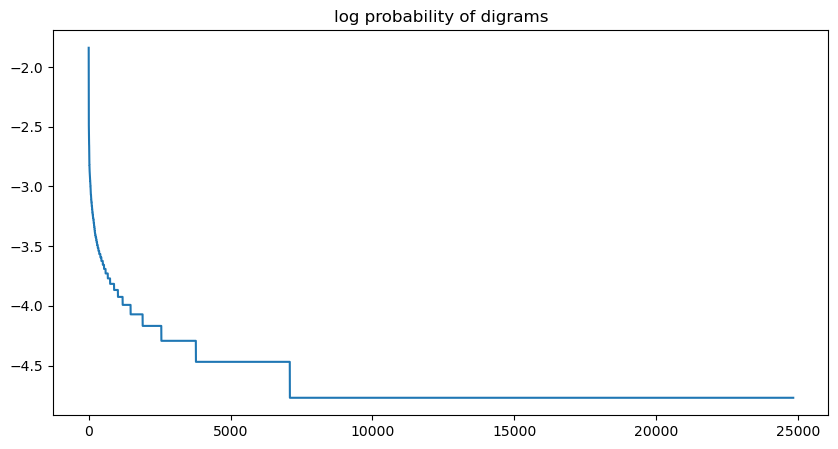

In [113]:
plt.figure(figsize=(10, 5))
plt.plot([np.log10(pair[1]) for pair in pairs])
plt.title("log probability of digrams")
None

In [114]:
N = len(words)
T = torch.zeros((N, N))
for c1, c2 in zip(tokens[:-1], tokens[1:]):
    i1 = words.index(c1)
    i2 = words.index(c2)
    T[i1, i2] += 1
P = T / T.sum(dim=1, keepdim=True)
P


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0004, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0021, 0.0014,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

tensor(0.0742)

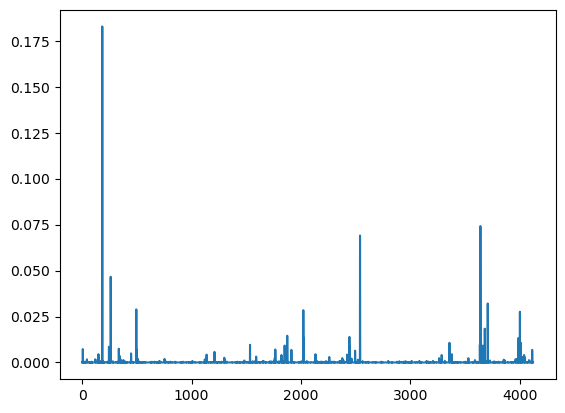

In [115]:
P[1] # ","
plt.plot(P[1])
P[1].sum()
P[1].argmax()
words[184]
P[1, words.index("that")]

In [116]:

gen = torch.manual_seed(2)

for _ in range(10):
    tokens = []
    i = words.index(".")
    for _ in itertools.count():
        i = torch.multinomial(P[i], 1, replacement=True, generator=gen)[0]
        tokens.append(words[i])
        if tokens[-1] == ".":
            break
    print(" ".join(tokens))

to which thou then is by death as are far greater which be : this means give thanks to one of conditions , than truth , to that all things for they are present occasions may not able to be in present depart , or if it , wherein should hinder , which was not fire , grounded upon what is true meaning is such inducement .
and reason and down grapes , whether just : into the legend of part of the same fashion herself .
again from thee .
as heard , and rashness and carriage towards thy mind them that have their duration , or , yet is fiery , than in his care shall study of nature of it is but perchance , is either he would carry thyself , and increase .
it is it ? to comprehend in exhibiting of great moment but dreams that especially , or proper unto any corporal either good , as others .
is requisite ; and endeavour to be more , as plainly and the divine providence ; obey him also wilt pity him better wrestler s sake , thou mayst look back , or honour and conducing to be grave a man upon a